<a href="https://colab.research.google.com/github/joaovfin/Projetos/blob/main/Beta_e_Correlacao_PETR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculando o Beta de uma ação

In [76]:
!pip install yfinance --upgrade --no-cache-dir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()

!pip install git+https://github.com/quantopian/pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [268]:
tickers = ["PETR3.SA","^BVSP"]
carteira=web.get_data_yahoo(tickers,start="2016-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [269]:
carteira

,PETR3.SA,^BVSP
Date,,
2016-01-04,8.670000,42141.0
2016-01-05,8.450000,42419.0
2016-01-06,8.060000,41773.0
2016-01-07,7.830000,40695.0
2016-01-08,7.860000,40612.0
...,...,...
2021-02-10,28.049999,118430.0
2021-02-11,28.309999,119235.0
2021-02-12,28.500000,119116.0


In [277]:
carteira=carteira.dropna()
carteira.columns=["PETR3","IBOV"]
carteira

,PETR3,IBOV
Date,,
2016-01-04,8.670000,42141.0
2016-01-05,8.450000,42419.0
2016-01-06,8.060000,41773.0
2016-01-07,7.830000,40695.0
2016-01-08,7.860000,40612.0
...,...,...
2021-02-10,28.049999,118430.0
2021-02-11,28.309999,119235.0
2021-02-12,28.500000,119116.0


In [278]:
retorno= (carteira/carteira.iloc[0]) #Retorno da carteira
cov=retorno.cov()*252 #Covariança entre ação e mercado
cov

,PETR3,IBOV
PETR3,166.787108,89.678762
IBOV,89.678762,59.485772


Text(0.5, 0, 'DATA')

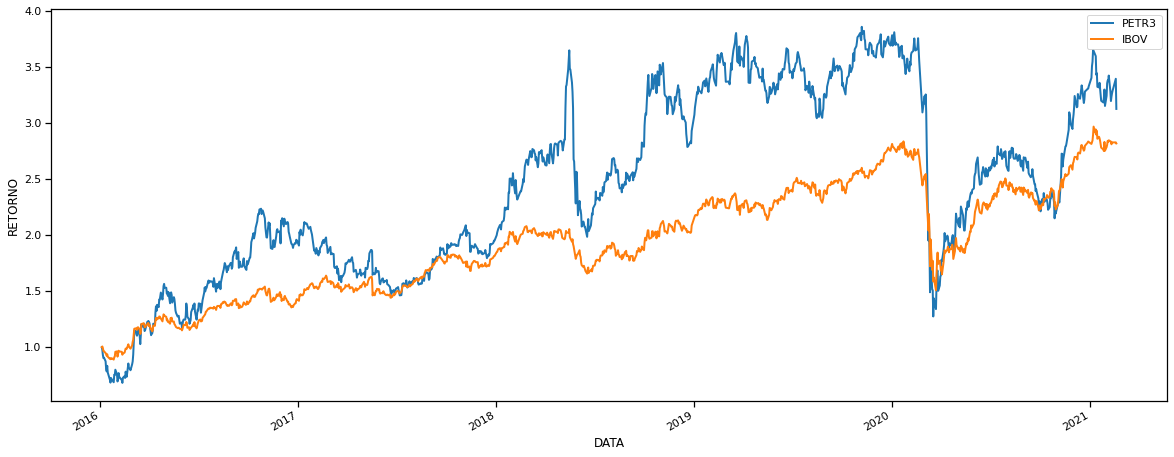

In [279]:
retorno.plot(figsize=(20,8))
plt.ylabel("RETORNO")
plt.xlabel("DATA")

In [280]:
cov_market=cov.iloc[0,1] #Covariança da ação com o mercado como float
market_var=retorno['IBOV'].var()*252 #Variança anualizada do IBOVESPA
print(cov_market) 
print(market_var)

89.6787615787161
59.48577233068678


In [281]:
Beta_ativo=cov_market/market_var
if (Beta_ativo>1):
  print("A açao tem um beta igual a", Beta_ativo)
  print("Beta maior que 1, significa que a ação tem maior risco que o mercado")
elif (Beta_ativo==1):
  print("A açao tem um beta igual a", Beta_ativo)
  print("Beta igual a 1, significa que a ação tem mesmo risco que o mercado")
else:
  print("A açao tem um beta igual a", Beta_ativo)
  print("Beta menor que 1, significa que a ação tem menos risco que o mercado")


A açao tem um beta igual a 1.5075665670134326
Beta maior que 1, significa que a ação tem maior risco que o mercado


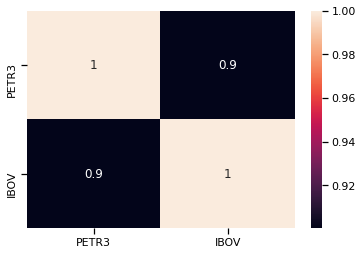

In [282]:
sns.heatmap(carteira.corr(),annot=True)

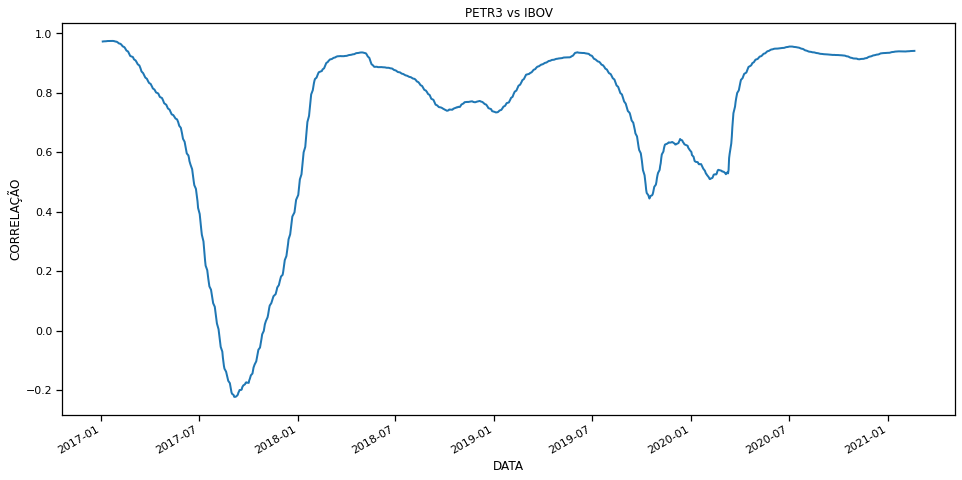

In [283]:
carteira["IBOV"].rolling(252).corr(carteira["PETR3"]).plot(figsize=(16,8))
plt.ylabel("CORRELAÇÃO")
plt.xlabel("DATA")
plt.title("PETR3 vs IBOV")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2})
